# Housing.csv EDA_ end to end in class

In [1]:
import numpy as np
import pandas as pd

In [2]:
A = pd.read_csv("House_Price.csv")

In [3]:
A.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
crime_rate     506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
dtypes: float64(15), int64(1), object(3)
memory usage: 69.2+ KB


Inference from info:
There are 3 cat. variables
in no.13, there are 8null values

In [5]:
#check actual null values
A.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [6]:
#lets see the cat. variables one by one

#airport

A.airport.nunique()

2

In [7]:
#each group, see count
A['airport'].value_counts()

YES    279
NO     227
Name: airport, dtype: int64

In [8]:
# now proportion
A['airport'].value_counts(normalize = True).mul(100).round(1)

YES    55.1
NO     44.9
Name: airport, dtype: float64

In [9]:
#bus_ter
A['bus_ter'].value_counts()

YES    506
Name: bus_ter, dtype: int64

In [10]:
A['bus_ter'].value_counts(normalize=True).mul(100).round(1)
#will drop this variable later

YES    100.0
Name: bus_ter, dtype: float64

In [11]:
#waterbody
A['waterbody'].value_counts()

River             183
None              155
Lake               97
Lake and River     71
Name: waterbody, dtype: int64

In [12]:
A['waterbody'].value_counts(normalize=True).mul(100).round(1)

River             36.2
None              30.6
Lake              19.2
Lake and River    14.0
Name: waterbody, dtype: float64

In [13]:
#importing visualization packages
import matplotlib as plt
import seaborn as sns

%matplotlib inline

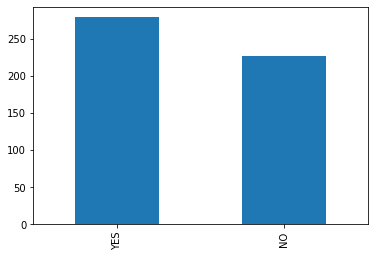

In [14]:
#for airport
A['airport'].value_counts().plot(kind = 'bar')

In [15]:
#is na there in airport
A['airport'].isnull().sum()

0

In [16]:
#water body
A['waterbody'].isnull().sum()

0

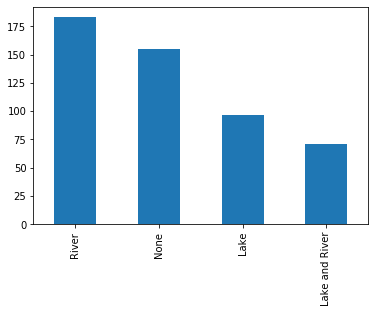

In [17]:
A['waterbody'].value_counts().plot(kind="bar")

In [18]:
#bus_ter
A['bus_ter'].isna().sum()

0

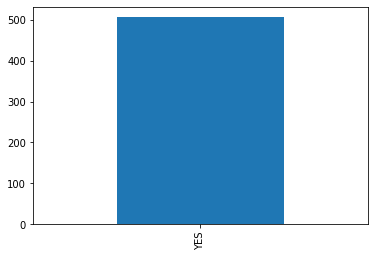

In [19]:
A['bus_ter'].value_counts().plot(kind = 'bar')

In [20]:
#dropping the bus_ter column
A.drop('bus_ter',axis = 1,inplace = True)

In [21]:
#to check if it has been dropped or not
A.shape

(506, 18)

In [22]:
#lets see info again
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
price          506 non-null float64
crime_rate     506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
parks          506 non-null float64
dtypes: float64(15), int64(1), object(2)
memory usage: 67.3+ KB


In [23]:
#price is the target column
A['price'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: price, dtype: float64

In [24]:
### we have 4 distances, so lets just take an average
A["avg_dist"] = A[["dist1","dist2","dist3","dist4"]].mean(axis=1)

In [25]:
A

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,4.0875
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,4.9675
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,0.045764,4.9675
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,6.0650
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,6.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,0.056006,2.4775
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,0.059903,2.2875
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,0.057572,2.1675
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,0.060694,2.3900


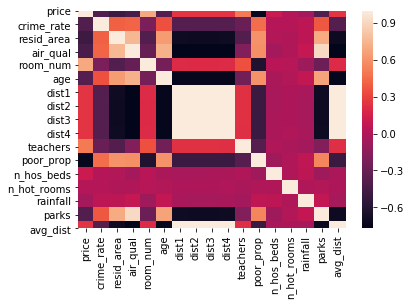

In [26]:
#check correlation between dist1-4 and avg before deleting them
# sir told to check full together using heatmap
# see how to check dist1-4 and avg_dist
sns.heatmap(A.corr())

In [27]:
#now drop it
A.drop(["dist1","dist2","dist3","dist4"], axis = 1, inplace = True)

In [28]:
A.shape

(506, 15)

In [29]:
#now, airport is either yes or no.
# Converting Yes to 1 and No to 0
A['airport'] = A['airport'].map({'YES': 1, 'NO': 0})

In [30]:
A.airport.value_counts()

1    279
0    227
Name: airport, dtype: int64

# Lets start univariate analysis now

In [31]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
price          506 non-null float64
crime_rate     506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null int64
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
parks          506 non-null float64
avg_dist       506 non-null float64
dtypes: float64(12), int64(2), object(1)
memory usage: 57.4+ KB


crime_rate

In [32]:
#lets start with crime rate
A['crime_rate'].describe()
#data is skewed
#many outliers are present

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       88.976200
Name: crime_rate, dtype: float64

In [33]:
A['crime_rate'].skew()
# ideally skewness should be -1 to +1

5.223148798243851

In [34]:
sns.line(A['crime_rate'])

AttributeError: module 'seaborn' has no attribute 'line'

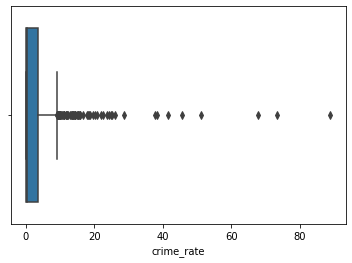

In [35]:
#to check outliers
sns.boxplot(A['crime_rate'])

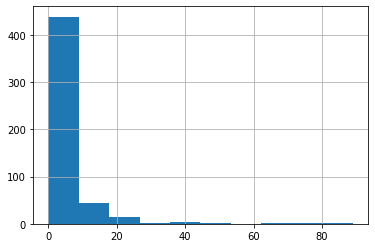

In [36]:
A['crime_rate'].hist()

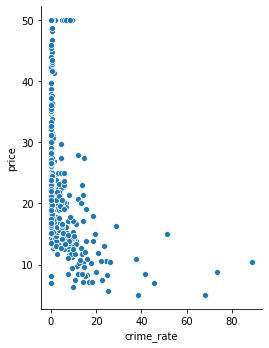

In [37]:
sns.pairplot(A, x_vars = ['crime_rate'], y_vars = ['price'], height = 5, aspect = 0.8)

we see that crime_rate vs prices will give us a log graph.
we can do transformation but most data is 0, the log of which is infinity
therefore, we add 1 to crime rate for all rows.
Then we do transformation, after removing the outliers

In [38]:
#lets first 
np.percentile(A['crime_rate'], 95)

15.78915

In [39]:
A['crime_rate'].quantile(0.95)

15.78915

In [40]:
# outliers treatment by sir
print(A['crime_rate'].quantile(0.050)) 
print(A['crime_rate'].quantile(0.95)) 
A['crime_rate'] = np.where(A['crime_rate'] > 15.78915 ,20 , A['crime_rate'])
A["crime_rate"].describe()


0.02791
15.78915


count    506.000000
mean       3.012323
std        5.318902
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       20.000000
Name: crime_rate, dtype: float64

In [41]:
#lets transform
A['crime_rate'] = A['crime_rate'] + 1

In [42]:
#create new column for log transformation
A['log_crime_rate'] = np.log(A['crime_rate'])

In [43]:
A['log_crime_rate'].describe()
#now we see that there is no skewness and no outliers

count    506.000000
mean       0.797174
std        0.978009
min        0.006300
25%        0.078853
50%        0.228336
75%        1.542674
max        3.044522
Name: log_crime_rate, dtype: float64

In [44]:
#drop the crime_rate
A.drop(['crime_rate'], axis = 1, inplace = True)

In [45]:
#check skewness
A['log_crime_rate'].skew()

1.102433813741948

residential area

In [46]:
A['resid_area'].describe()

count    506.000000
mean      41.136779
std        6.860353
min       30.460000
25%       35.190000
50%       39.690000
75%       48.100000
max       57.740000
Name: resid_area, dtype: float64

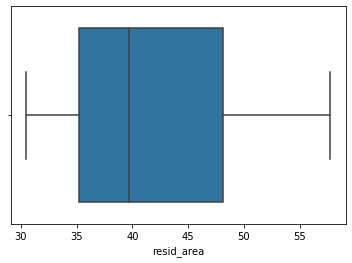

In [47]:
sns.boxplot(A['resid_area'])

In [72]:
A['resid_area'].isnull().sum()

0

In [49]:
A['resid_area'].skew()

0.2950215678735116

AIR_QUALITY

In [50]:
A['air_qual'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: air_qual, dtype: float64

In [51]:
A['air_qual'].skew()

0.7293079225348785

In [52]:
A['air_qual'].isna().sum()

0

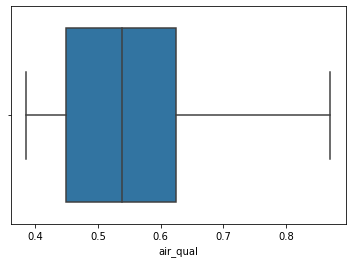

In [53]:
sns.boxplot(A['air_qual'])

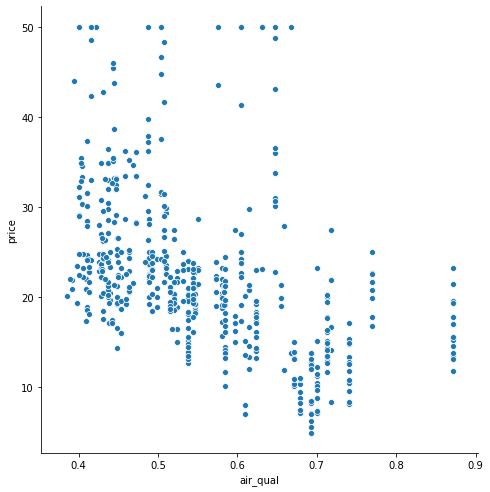

In [54]:
sns.pairplot(A, x_vars = ['air_qual'], y_vars = ['price'], height = 7, aspect = 1)

In [55]:
A['room_num'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: room_num, dtype: float64

In [56]:
A['room_num'].skew()

0.4036121332887437

In [57]:
A['room_num'].isnull().sum()

0

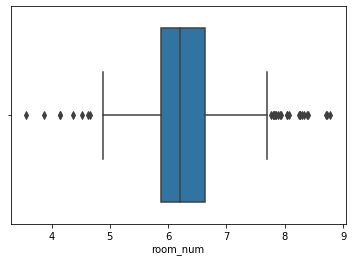

In [58]:
sns.boxplot(A['room_num'])

In [59]:
# outliers treatment by sir
print(A['room_num'].quantile(0.050)) 
print(A['room_num'].quantile(0.95)) 
A['room_num'] = np.where(A['room_num'] > 7.5875 , 7.5 , A['room_num'])
A['room_num'] = np.where(A['room_num'] < 5 , 5 , A['room_num'])


A["room_num"].describe()


5.314
7.5875


count    506.000000
mean       6.268490
std        0.595608
min        5.000000
25%        5.885500
50%        6.208500
75%        6.623500
max        7.520000
Name: room_num, dtype: float64

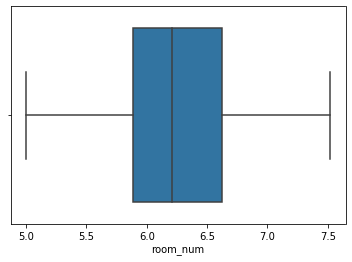

In [60]:
sns.boxplot(A['room_num']) #all outliers is gone

remaining treatment we won't do, so that we can compare our model before and after treating

In [61]:
A

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist,log_crime_rate
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.1920,River,23,0.049347,4.0875,0.006300
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.1728,Lake,42,0.046146,4.9675,0.026944
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,101.1200,None,38,0.045764,4.9675,0.026924
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.2672,Lake,45,0.047151,6.0650,0.031857
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.2896,Lake,55,0.039474,6.0625,0.066770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,19.0,9.67,0,9.348,12.1792,Lake and River,27,0.056006,2.4775,0.060747
502,20.6,41.93,0.573,6.120,76.7,19.0,9.08,1,6.612,13.1648,Lake and River,20,0.059903,2.2875,0.044275
503,23.9,41.93,0.573,6.976,91.0,19.0,5.64,0,5.478,12.1912,None,31,0.057572,2.1675,0.058986
504,22.0,41.93,0.573,6.794,89.3,19.0,6.48,1,7.940,15.1760,None,47,0.060694,2.3900,0.103991


n_hot_beds

In [62]:
A['n_hos_beds'].describe()

count    498.000000
mean       7.899767
std        1.476683
min        5.268000
25%        6.634500
50%        7.999000
75%        9.088000
max       10.876000
Name: n_hos_beds, dtype: float64

In [63]:
A['n_hos_beds'].skew()

-0.009175681230170077

In [64]:
A['n_hos_beds'].isnull().sum()

8

In [65]:
#replace with mean as sir said
#using where function
A['n_hos_beds'] = np.where(A['n_hos_beds'].isnull() == True , np.mean(A['n_hos_beds']), A['n_hos_beds'])


In [66]:
A['n_hos_beds'].isnull().sum()# 0 null values

0

In [441]:
#another way to replace
#median1=A["n_hos_beds"].median()
#A["n_hos_beds"].replace(np.nan,median1,inplace= True)

Data cleaning more or less done

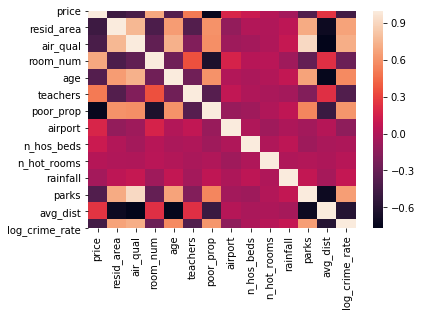

In [67]:
sns.heatmap(A.corr())

In [68]:
#to increase the size of the canvas
plt.figure(figsize = (10,8))
sns.heatmap(A.corr(), annot = True)


TypeError: 'module' object is not callable

In [444]:
# high correlation
# air_qual and parks ----> 0.92


# Creating dummy variables

In [445]:
# for airport it is 0 and 1 so already created
# we need to create for water body

In [69]:
status = pd.get_dummies(A['waterbody'], drop_first = True) #read about dummy variable traps
status.head()

,Lake and River,None,River
0,0,0,1
1,0,0,0
2,0,1,0
3,0,0,0
4,0,0,0


In [70]:
#now add this to the main dataset and drop waterbody
#Adding the results to the master dataframe
A = pd.concat([A,status],axis=1)

A.drop(['waterbody'], axis=1, inplace = True)
A.head()


,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,log_crime_rate,Lake and River,None,River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.1920,23,0.049347,4.0875,0.006300,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.1728,42,0.046146,4.9675,0.026944,0,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,101.1200,38,0.045764,4.9675,0.026924,0,1,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.2672,45,0.047151,6.0650,0.031857,0,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.2896,55,0.039474,6.0625,0.066770,0,0,0


# Splitting the data for train and test

In [71]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
price             506 non-null float64
resid_area        506 non-null float64
air_qual          506 non-null float64
room_num          506 non-null float64
age               506 non-null float64
teachers          506 non-null float64
poor_prop         506 non-null float64
airport           506 non-null int64
n_hos_beds        506 non-null float64
n_hot_rooms       506 non-null float64
rainfall          506 non-null int64
parks             506 non-null float64
avg_dist          506 non-null float64
log_crime_rate    506 non-null float64
Lake and River    506 non-null uint8
None              506 non-null uint8
River             506 non-null uint8
dtypes: float64(12), int64(2), uint8(3)
memory usage: 56.9 KB
